In [2]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Convolution code

In [7]:
def convolution(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = (kW - 1) // 2

    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in range(pad, iH + pad):
        for x in range(pad, iW + pad):
            roi = image[y-pad : y+pad+1, x-pad : x+pad+1 ]
            k = (roi * kernel).sum()
            output[y-pad, x-pad] = k
    
    output = rescale_intensity(output, in_range=(0,255))
    output = (output * 255).astype("uint8")

    return output

## testing

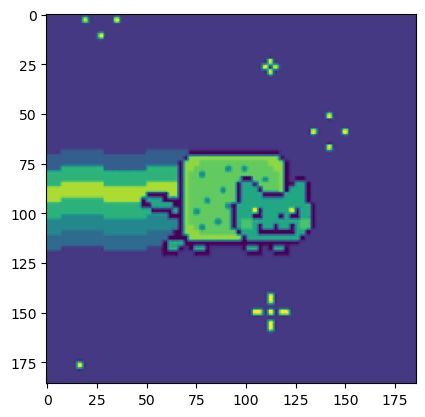

In [4]:
#original img
img = cv2.imread("./nyan_cat.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [25]:
#blur

#kernels
small_blur = (np.ones((7,7), dtype="float")/49)
large_blur = (np.ones((21,21), dtype="float")/(21*21))

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]], dtype="int"
    )

laplacian = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]], dtype="int"
)

sobelX = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ], dtype="int"
)

sobelY = np.array([
    [-1,-2,-1],
    [0, 0, 0],
    [1, 2, 1]
    ], dtype="int"
)

local_vars = locals()
kernels = (
    ("small_blur",small_blur)
    , ("large_blur", large_blur)
    , ("sharpen", sharpen)
    , ("laplacian", laplacian)
    , ("sobelX", sobelX)
    , ("sobelY", sobelY)
)
plt_sub = 100+len(kernels)*10+1 #only works when len(kernels) < 10
plt.figure(figsize=(500,100))
for i, (name, kernel) in enumerate(kernels):
    plt.subplot(plt_sub+i)
    plt.title(name)
    plt.imshow(convolution(img, kernel))



## same function in cv2

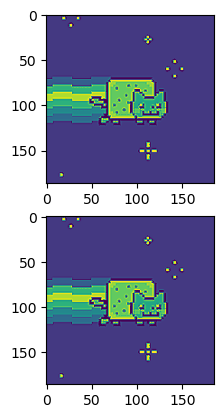

In [8]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]], dtype="int"
    )


plt.figure()
plt.subplot(211)
plt.imshow(cv2.filter2D(img, -1, sharpen))
plt.subplot(212)
plt.imshow(convolution(img, sharpen))